# Linear Models

- Linear relationship between Dependent and Independent variables
- Eg: Weight vs Height, Size of Land vs Price of Land

Y= βX + b

β = Angle (slope)
b = Intercept

We can create a line with beta and b and then calculate the error which this line would have from underlying data points. The idea is to find the line which gives least error. So, it ends up becoming an **optimization** problem.

In [6]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse

In [2]:
# creating the sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

data = pd.DataFrame({
    "salary" : salary,
    "experience"   : experience
})
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


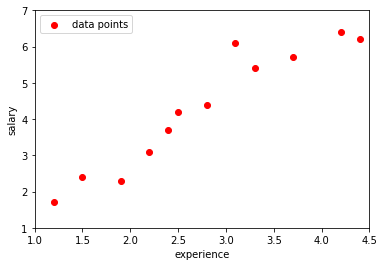

In [3]:
# plotting the data
plt.scatter(data.experience, data.salary, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

## Computing Cost over a range of values of Beta


In [4]:
# function to calculate error

def Error(Beta, data):
  # b is constant
    b = 1.1
  
    salary = []
    experience  = data.experience
  
  # Loop to calculate predict salary variables
    for i in range(len(data.experience)):
        tmp = data.experience[i] * Beta + b
        salary.append(tmp)
    MSE = mse(data.salary, salary)
    return MSE

In [7]:
# Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0,150)]
Cost = []
for i in slope:
    cost = Error( Beta = i, data = data)
    Cost.append(cost)

In [8]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : Cost
})
Cost_table.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


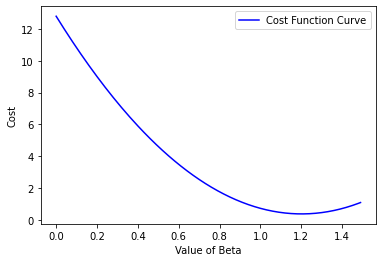

In [9]:
## Visualising cost with respect to Beta
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

Now, we need to find a way to identify the location where my cost is lowest. We cannot do it iteratively, so therefore we us gradiant decent method